In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from time import time


In [2]:
# Paths
with open('data_path.txt', 'r') as file:
    data_folder = file.read().replace('\n', '')
TRAIN_PATH = data_folder + '/train.csv'
TEST_PATH = data_folder + '/test.csv'
SAMPLE_SUBMISSION_PATH = data_folder + '/sample_submission.csv'



In [3]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)
sample_submission_df = pd.read_csv(SAMPLE_SUBMISSION_PATH)

In [4]:
targets_for_test_df = test_df['close'] / test_df['close'].shift(1)
targets_for_test_df = targets_for_test_df > 1
targets_for_test_df = targets_for_test_df.astype(int).shift(-1)
targets_for_test_df.dropna(inplace=True)


## Does Test start right after Train?

In [5]:
# Convert the timestamp to datetime if not already done
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'], unit='s')

# Get the last timestamp
last_timestamp = train_df['timestamp'].iloc[-1]
print(f"Last timestamp in datetime format: {last_timestamp}")

# Convert the timestamp to datetime if not already done
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'], unit='s')

# Get the last timestamp
last_timestamp = test_df['timestamp'].iloc[0]
print(f"Last timestamp in datetime format: {last_timestamp}")


Last timestamp in datetime format: 2022-05-17 19:58:00
Last timestamp in datetime format: 2022-05-17 19:58:00


# Check Line codependency/correlation

## Spearman Corr

In [7]:
train_df = pd.read_csv(TRAIN_PATH)


timestamp = pd.to_datetime(train_df['timestamp'], unit='s')
time_diff = timestamp.diff().dt.total_seconds()
time_gaps = time_diff[time_diff > 60]  # Assuming a gap is more than 60 seconds
print(time_gaps)

spearman_corr = train_df.corr(method='spearman')

# Create a lagged version of the dataframe
lagged_df = train_df.shift(1)
lagged2_df = train_df.shift(2)
lagged3_df = train_df.shift(3)
lagged4_df = train_df.shift(4)

def calculate_correlation_matrix(df1, df2):
    correlation_matrix = pd.DataFrame(index=df1.columns, columns=df2.columns)
    for col1 in df1.columns:
        for col2 in df2.columns:
            correlation_matrix.loc[col1, col2] = df1[col1].corr(df2[col2], method='spearman')
    return correlation_matrix.astype(float)

correlation_matrix1 = calculate_correlation_matrix(train_df, lagged_df)
correlation_matrix2 = calculate_correlation_matrix(train_df, lagged2_df)
correlation_matrix3 = calculate_correlation_matrix(train_df, lagged3_df)
correlation_matrix4 = calculate_correlation_matrix(train_df, lagged4_df)



Series([], Name: timestamp, dtype: float64)


KeyboardInterrupt: 

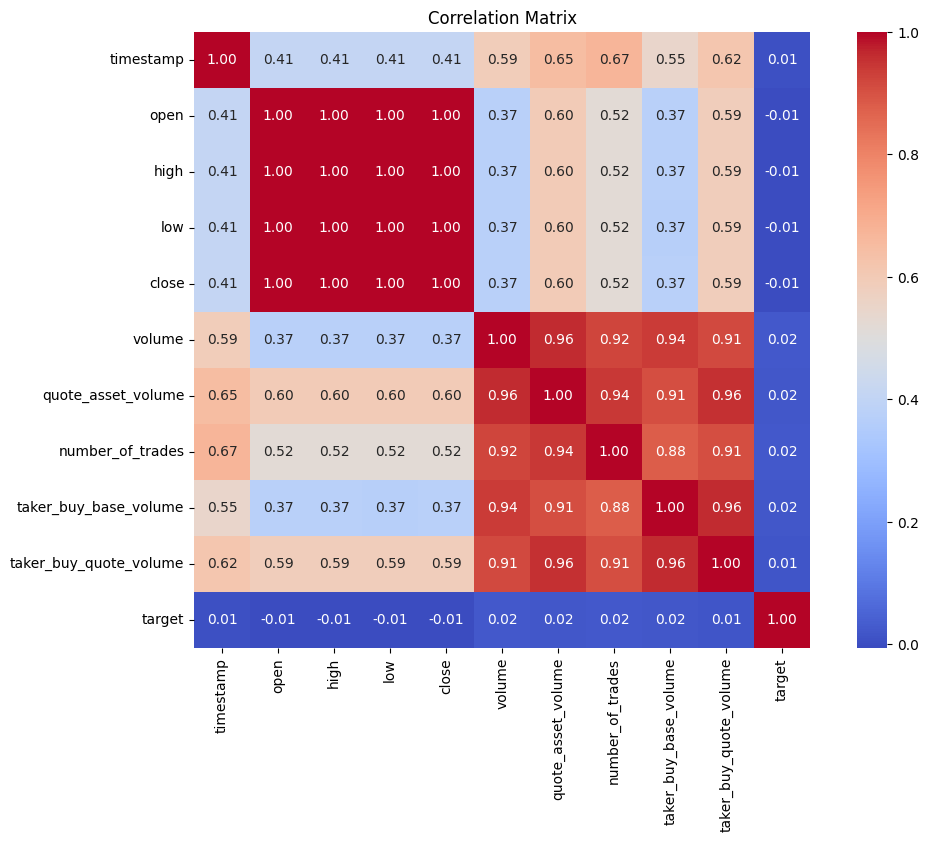

In [7]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

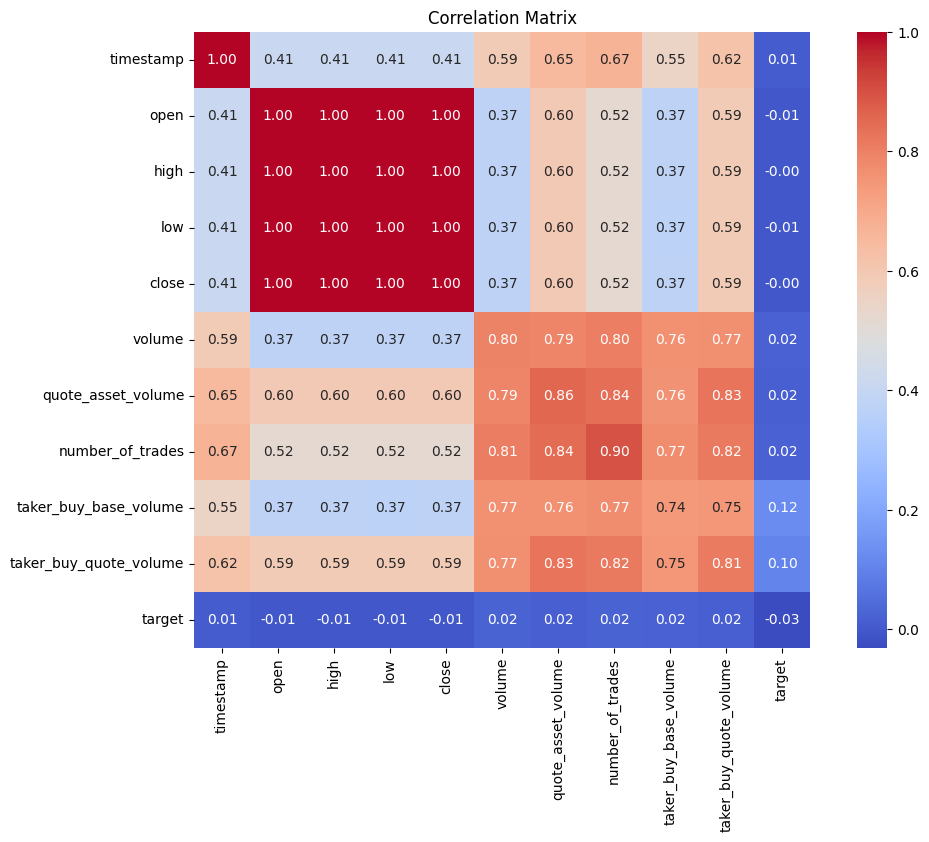

In [8]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix1, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

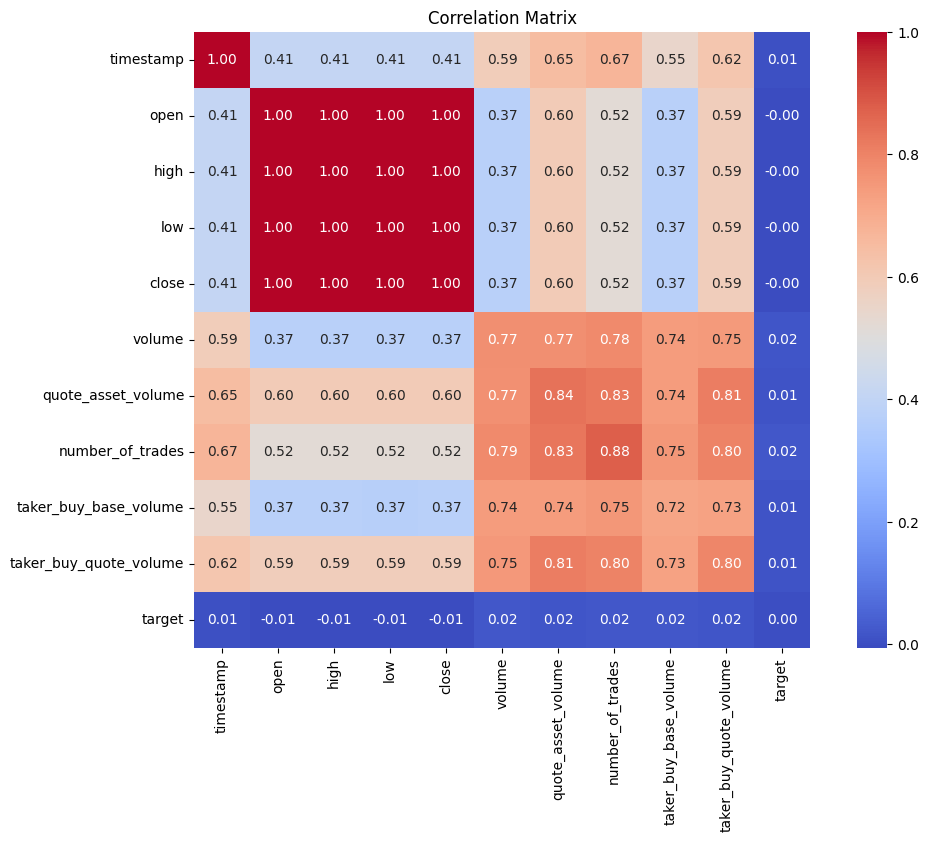

In [9]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

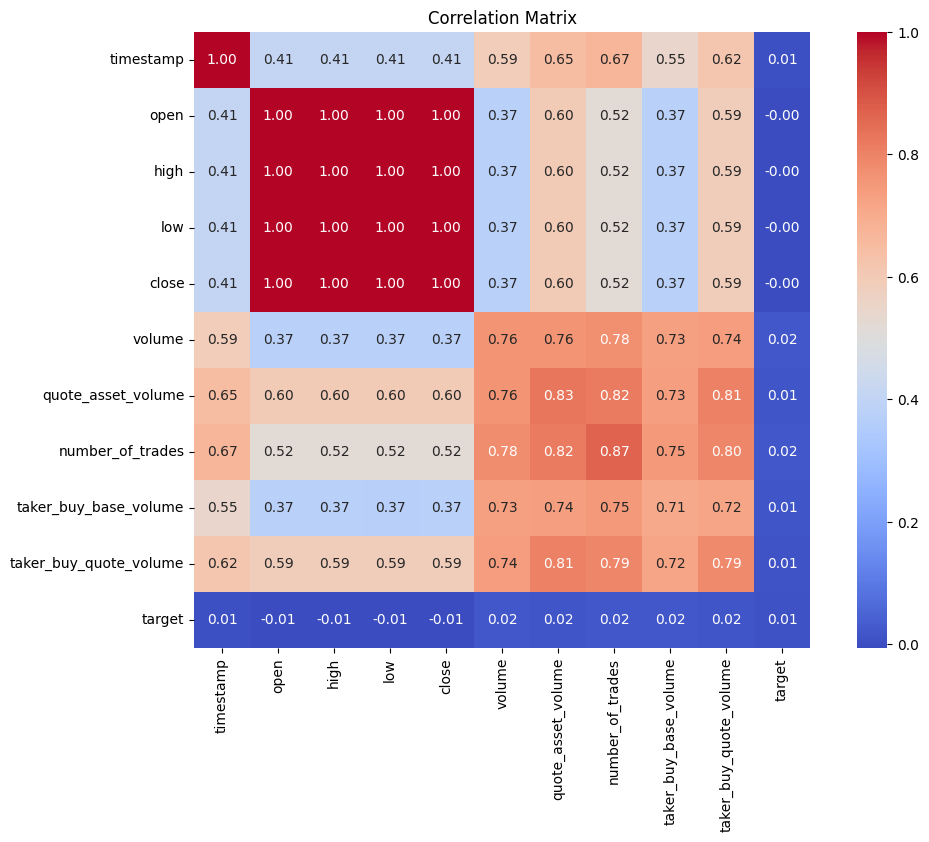

In [10]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix3, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

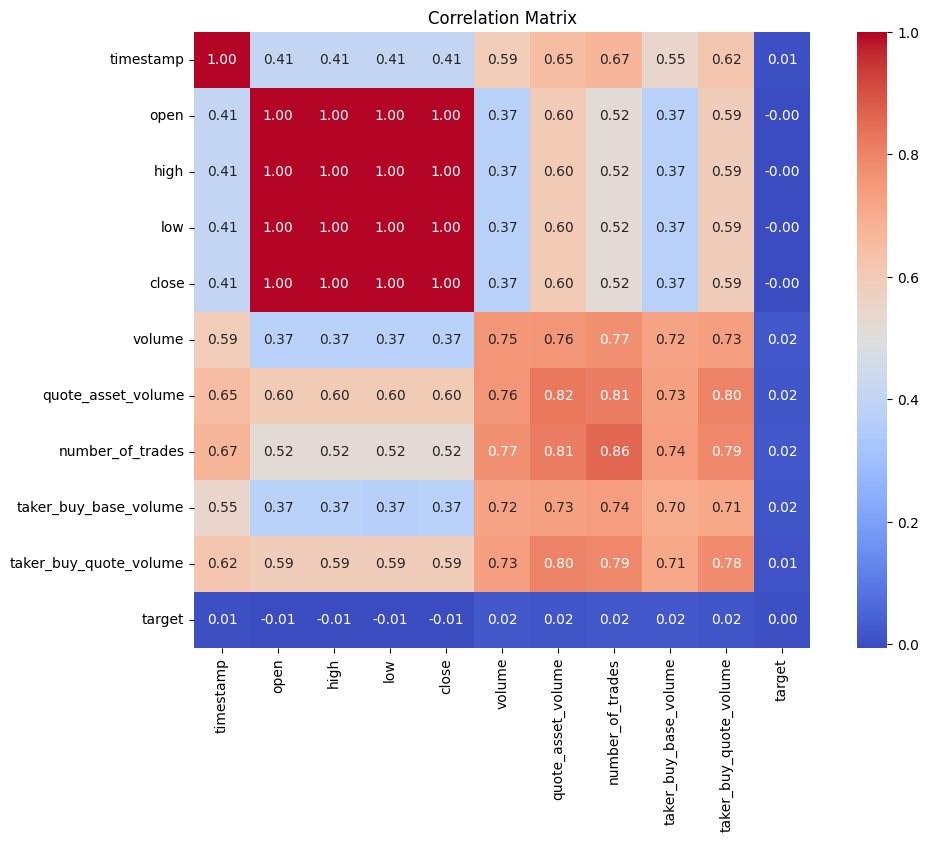

In [12]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix4, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

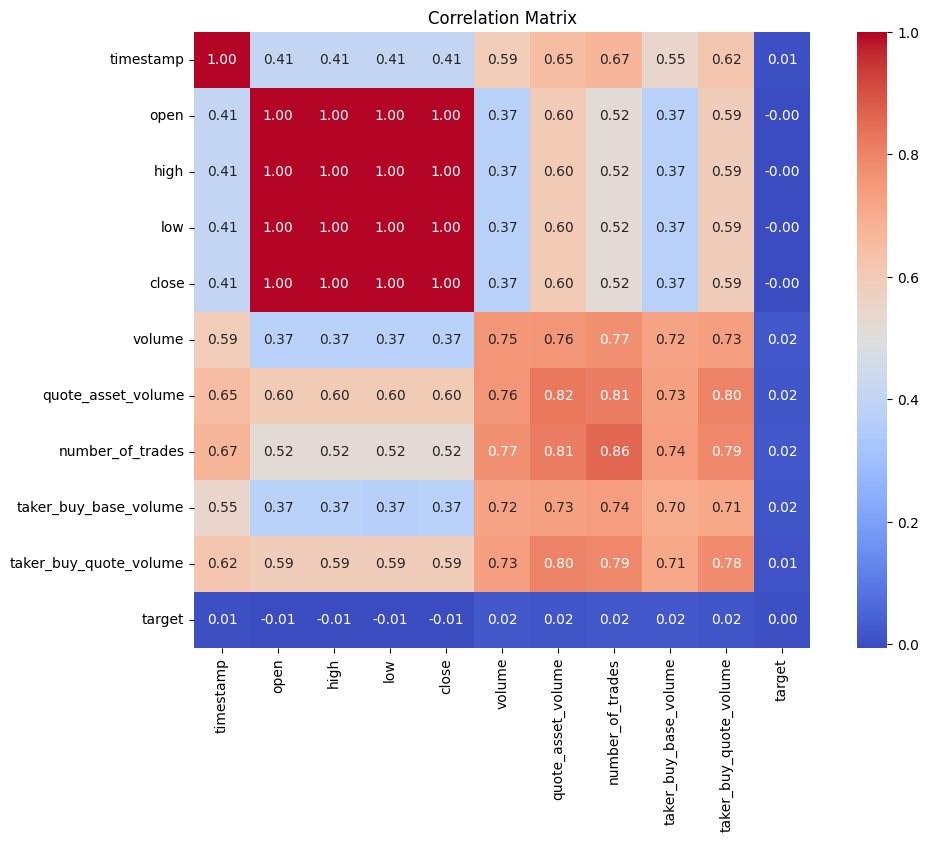

In [ ]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix4, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## Variance Inflation Factor 
VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity. A VIF value above 5-10 indicates significant multicollinearity.

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = train_df.columns
vif_data["VIF"] = [variance_inflation_factor(train_df.values, i) for i in range(len(train_df.columns))]

vif_data

,feature,VIF
0,timestamp,5.356778
1,open,291674.741435
2,high,316022.086326
3,low,358143.762068
4,close,335712.195285
5,volume,56.382064
6,quote_asset_volume,66.580724
7,number_of_trades,5.327577
8,taker_buy_base_volume,55.722774
9,taker_buy_quote_volume,61.449385


# Check min/max differences between prices 
remebering that prices as is are not got indicators to predict stock prices 

In [9]:

# Shift the 'close' column by one to get the next timestamp's closing price
shifted_close = train_df['close'].shift(-1)

diff_df = pd.DataFrame()
# Calculate the differences
diff_df['high_low_diff'] = train_df['high'] - train_df['low']
diff_df['open_close_diff'] = train_df['close'] - train_df['open']
diff_df['open_high_diff'] = train_df['high'] - train_df['open']
diff_df['open_low_diff'] = train_df['low'] - train_df['open']
growth_factors = train_df['close'] / train_df['open']
lagged_growth_factors = train_df['close'] / shifted_close


# Get the max and min differences
max_open_close_diff = diff_df['open_close_diff'].max()
min_open_close_diff = diff_df['open_close_diff'].min()

max_open_high_diff = diff_df['open_high_diff'].max()
min_open_high_diff = diff_df['open_high_diff'].min()

max_open_low_diff = diff_df['open_low_diff'].max()
min_open_low_diff = diff_df['open_low_diff'].min()

max_high_low_diff = diff_df['high_low_diff'].max()
min_high_low_diff = diff_df['high_low_diff'].min()

max_growth_factor = growth_factors.max()
min_growth_factor = growth_factors.min()

max_lagged_growth_factor = lagged_growth_factors.max()
min_lagged_growth_factor = lagged_growth_factors.min()

print(f"Max difference between opening and closing: {max_open_close_diff}")
print(f"Min difference between opening and closing: {min_open_close_diff}")

print(f"Max difference between opening and high: {max_open_high_diff}")
print(f"Min difference between opening and high: {min_open_high_diff}")

print(f"Max difference between opening and low: {max_open_low_diff}")
print(f"Min difference between opening and low: {min_open_low_diff}")

print(f"Max difference between high and low: {max_high_low_diff}")
print(f"Min difference between high and low: {min_high_low_diff}")

print(f"Max growth factor: {max_growth_factor}")
print(f"Min growth factor: {min_growth_factor}")

print(f"Max lagged growth factor: {max_lagged_growth_factor}")
print(f"Min lagged growth factor: {min_lagged_growth_factor}")

Max difference between opening and closing: 0.11450000000000005
Min difference between opening and closing: -0.10240000000000005
Max difference between opening and high: 0.13850000000000007
Min difference between opening and high: 0.0
Max difference between opening and low: 0.0
Min difference between opening and low: -0.14484999999999992
Max difference between high and low: 0.14659
Min difference between high and low: 0.0
Max growth factor: 1.1298922291548497
Min growth factor: 0.8467806358843266
Max lagged growth factor: 1.1806603773584905
Min lagged growth factor: 0.8809236947791165


# Visualize data

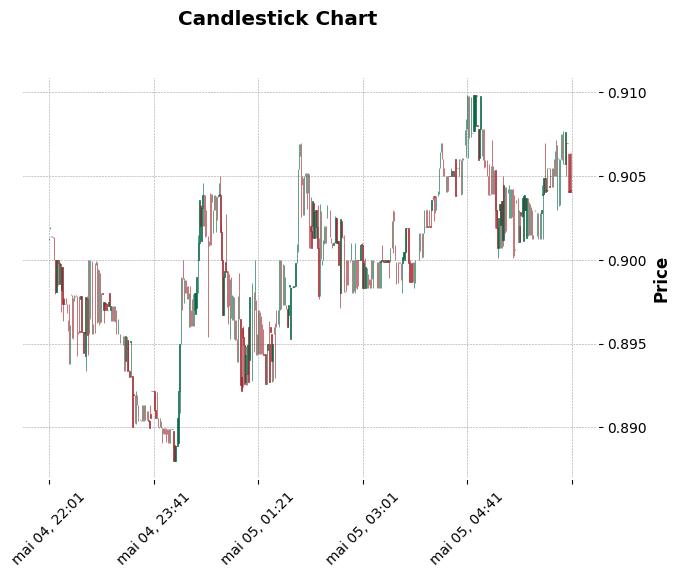

In [13]:
import mplfinance as mpf

# Create a copy of the train_df
ohlcv_df  = train_df.copy()

# Convert the timestamp to datetime if not already done
ohlcv_df ['timestamp'] = pd.to_datetime(ohlcv_df ['timestamp'], unit='s')

# Set the timestamp as the index
ohlcv_df .set_index('timestamp', inplace=True)

# Select the required columns for the candlestick chart
#ohlcv_df = ohlcv_df[['open', 'high', 'low', 'close', 'volume']]

# Plot the candlestick chart
mpf.plot(ohlcv_df[:500], type='candle', style='charles', title='Candlestick Chart', ylabel='Price')

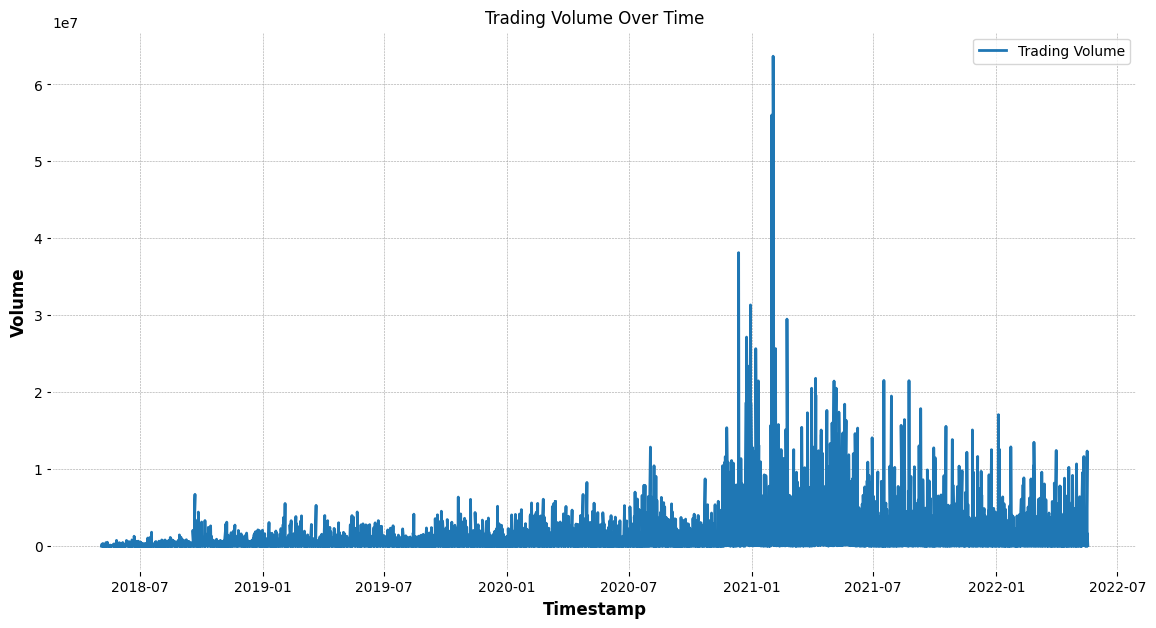

In [11]:
import matplotlib.pyplot as plt


# Plot the trading volume
plt.figure(figsize=(14, 7))
plt.plot(ohlcv_df.index, ohlcv_df['volume'], label='Trading Volume')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.legend()
plt.show()

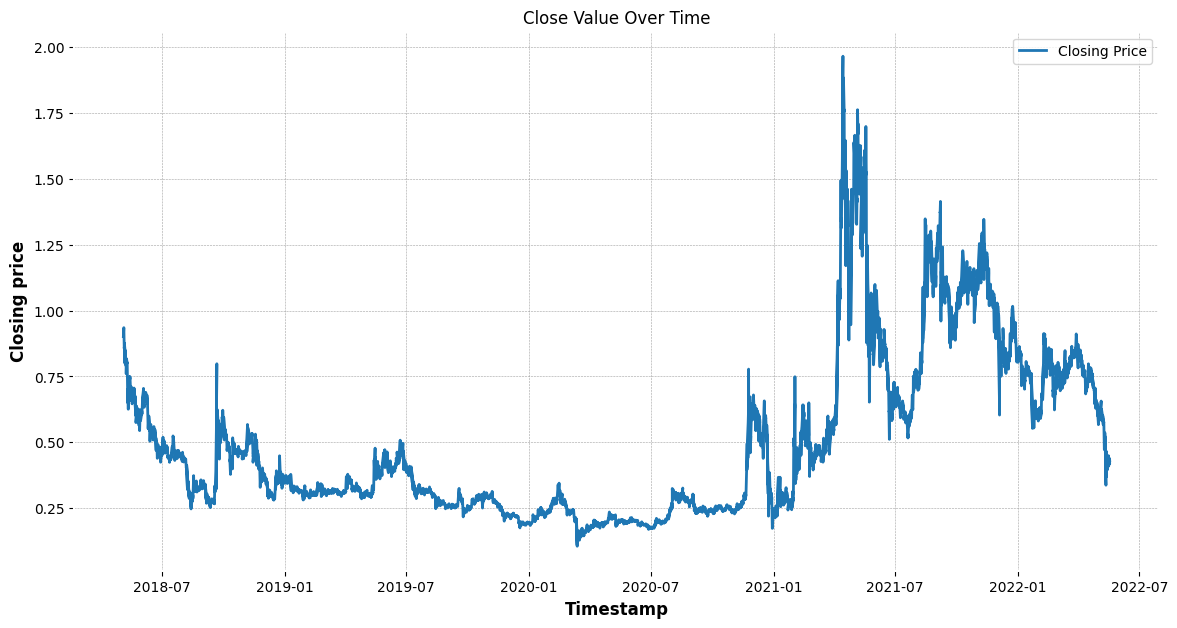

In [16]:
import matplotlib.pyplot as plt


# Plot the trading volume
plt.figure(figsize=(14, 7))
plt.plot(ohlcv_df.index, ohlcv_df['close'], label='Closing Price')
plt.xlabel('Timestamp')
plt.ylabel('Closing price')
plt.title('Close Value Over Time')
plt.legend()
plt.show()

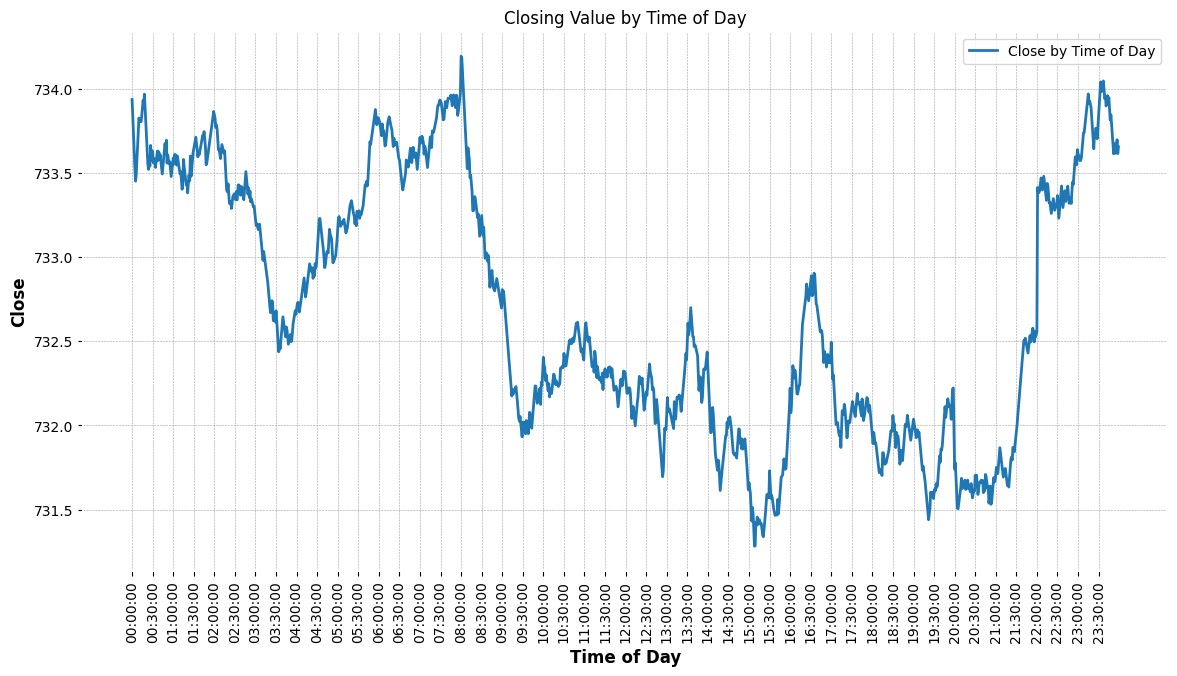

In [12]:
# Extract the time of day from the timestamp
ohlcv_df['time_of_day'] = ohlcv_df.index.time

# Group by the time of day and sum the closes
close_by_time_of_day = ohlcv_df.groupby(ohlcv_df['time_of_day'].astype(str))['close'].sum()

plt.figure(figsize=(14, 7))
plt.plot(close_by_time_of_day.index, close_by_time_of_day.values, label='Close by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Close')
plt.title('Closing Value by Time of Day')
# Set x-ticks to show only one label each 30 minutes
plt.xticks(ticks=range(0, len(close_by_time_of_day), 30), labels=close_by_time_of_day.index[::30], rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()



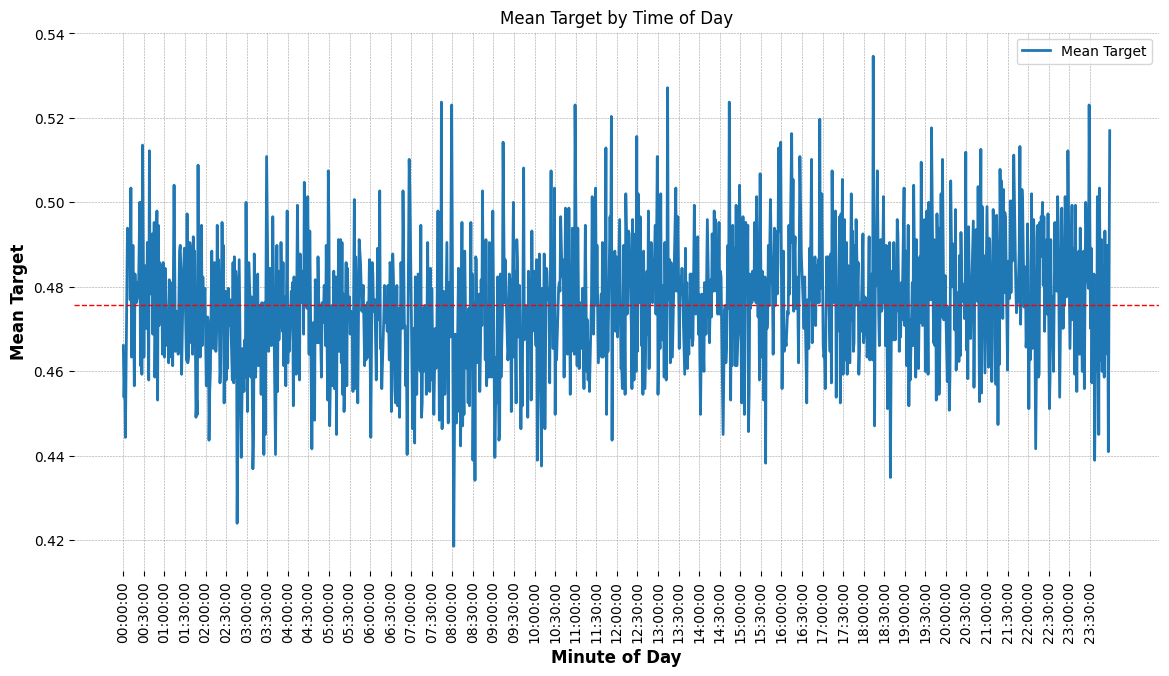

In [13]:
# Create copies of train_df and test_df
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

# Convert timestamp to datetime
train_df_copy['datetime'] = pd.to_datetime(train_df_copy['timestamp'], unit='s')
test_df_copy['datetime'] = pd.to_datetime(test_df_copy['timestamp'], unit='s')

test_df_copy['time'] = test_df_copy['datetime'].dt.time
train_df_copy['time'] = train_df_copy['datetime'].dt.time

# Group by minute of the day and calculate mean for each group
train_grouped_by_minute = train_df_copy.groupby('time').mean()
test_grouped_by_minute = test_df_copy.groupby('time').mean()
labels = train_grouped_by_minute.index

# Group by minute_of_day and calculate the mean target value for each group
mean_target_by_minute = train_grouped_by_minute['target']
mean_target_by_minute.index = labels.astype(str)



# Plot the mean target value by minute of day
plt.figure(figsize=(14, 7))
plt.rc('axes.spines', **{'bottom':False, 'left':False, 'right':False, 'top':False})
plt.plot(mean_target_by_minute.index, mean_target_by_minute.values, label='Mean Target')
plt.axhline(y=mean_target_by_minute.mean(), color='r', linestyle='--', linewidth=1)
plt.xlabel('Minute of Day')
plt.ylabel('Mean Target')
plt.title('Mean Target by Time of Day')
plt.xticks(ticks=range(0, len(labels), 30), labels=labels[::30], rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

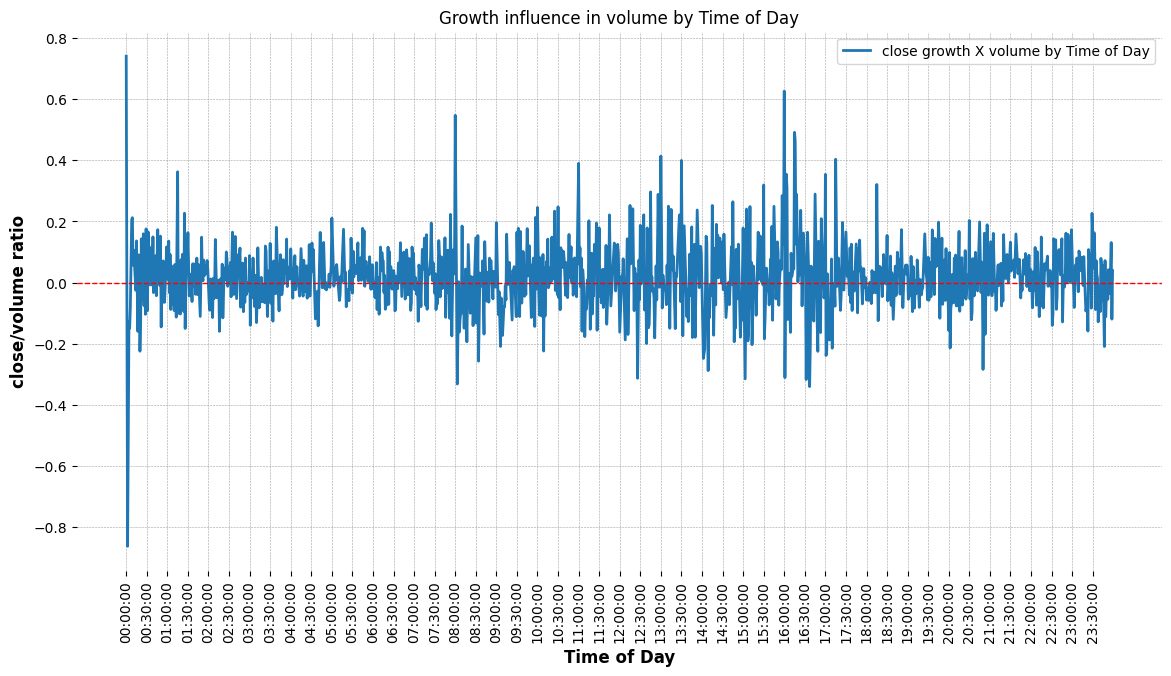

In [14]:


# Extract the time of day from the timestamp
ohlcv_df['time_of_day'] = ohlcv_df.index.time

# Group by the time of day and sum the volumes
volume_by_time_of_day = ohlcv_df.groupby(ohlcv_df['time_of_day'].astype(str))['volume'].sum()
volume_by_time_of_day_normalized = volume_by_time_of_day / volume_by_time_of_day.max()

close_by_time_of_day = ohlcv_df.groupby(ohlcv_df['time_of_day'].astype(str))['close'].sum()

close_growth = ohlcv_df['close'] / ohlcv_df['close'].shift(1)
close_growth_by_time_of_day = close_growth.groupby(ohlcv_df['time_of_day'].astype(str)).mean() - 1

# Normalize close_growth_by_time_of_day
min_val = close_growth_by_time_of_day.min()
max_val = close_growth_by_time_of_day.max()
close_growth_by_time_of_day_normalized = 2 * (close_growth_by_time_of_day - min_val) / (max_val - min_val) - 1

growth_influence_in_volume = volume_by_time_of_day_normalized * close_growth_by_time_of_day_normalized


plt.figure(figsize=(14, 7))
# plt.plot(volume_by_time_of_day_normalized.index, volume_by_time_of_day_normalized.values, label='volume by Time of Day')
# plt.plot(close_growth_by_time_of_day_normalized.index, close_growth_by_time_of_day_normalized.values, label='close growth by Time of Day1')
plt.plot(growth_influence_in_volume.index, growth_influence_in_volume.values, label='close growth X volume by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('close/volume ratio')
plt.title('Growth influence in volume by Time of Day')
# Set x-ticks to show only one label each 30 minutes
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xticks(ticks=range(0, len(close_growth_by_time_of_day), 30), labels=close_growth_by_time_of_day.index[::30], rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()



In [15]:
# Calculate the correlation between growth_influence_in_volume and target
correlation = growth_influence_in_volume.corr(targets_for_test_df)
print(f'Correlation between growth_influence_in_volume and target: {correlation}')

Correlation between growth_influence_in_volume and target: nan


In [16]:
# Calculate the correlation between close growth and volume
correlation_close_growth_volume = close_growth.corr(ohlcv_df['volume'])
print(f"Correlation between close growth and volume: {correlation_close_growth_volume}")


Correlation between close growth and volume: -0.03633268905475513


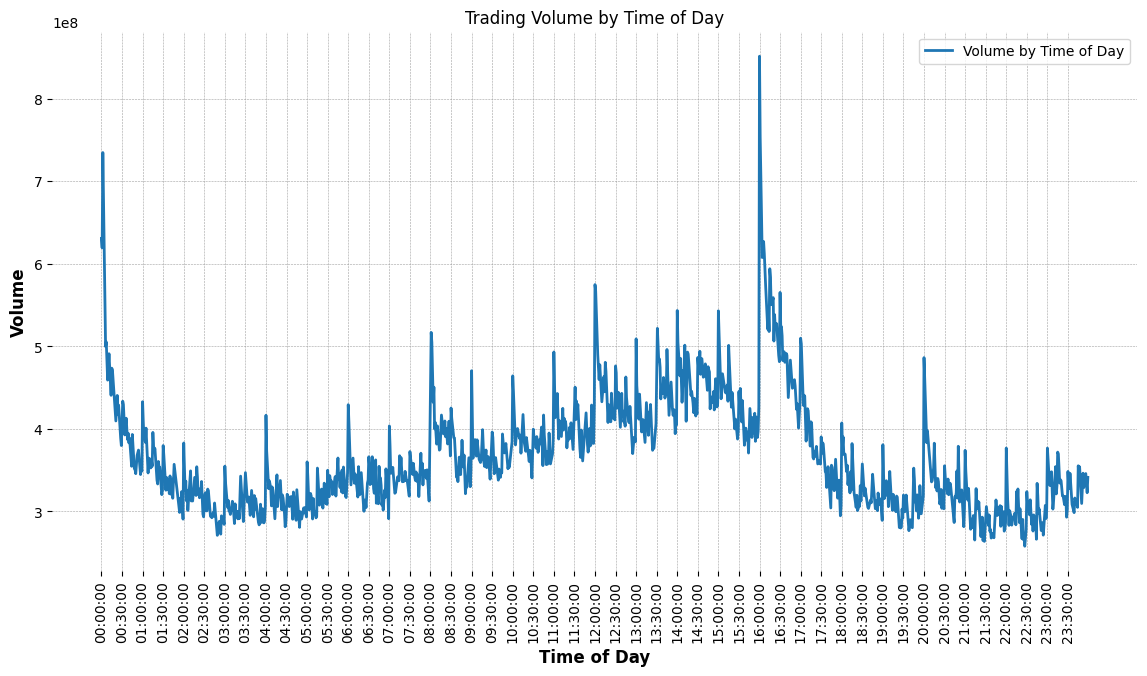

In [17]:
# Group by the time of day and sum the volumes
volume_by_time_of_day = ohlcv_df.groupby(ohlcv_df['time_of_day'].astype(str))['volume'].sum()

plt.figure(figsize=(14, 7))
plt.plot(volume_by_time_of_day.index, volume_by_time_of_day.values, label='Volume by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Volume')
plt.title('Trading Volume by Time of Day')
# Set x-ticks to show only one label each 30 minutes
plt.xticks(ticks=range(0, len(volume_by_time_of_day), 30), labels=volume_by_time_of_day.index[::30], rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [18]:
# Check if taker_buy_base_volume is ever bigger than volume
taker_buy_base_greater_than_volume = ohlcv_df['taker_buy_base_volume'] > ohlcv_df['volume']
''
# Print the result
if taker_buy_base_greater_than_volume.any():
    print("There are instances where taker_buy_base_volume is greater than volume.")
else:
    print("There are no instances where taker_buy_base_volume is greater than volume.")

There are no instances where taker_buy_base_volume is greater than volume.


C:\Users\PLour\AppData\Local\Temp\ipykernel_14824\4180624854.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  target_3h = target_3h['target'].resample('3H').sum()


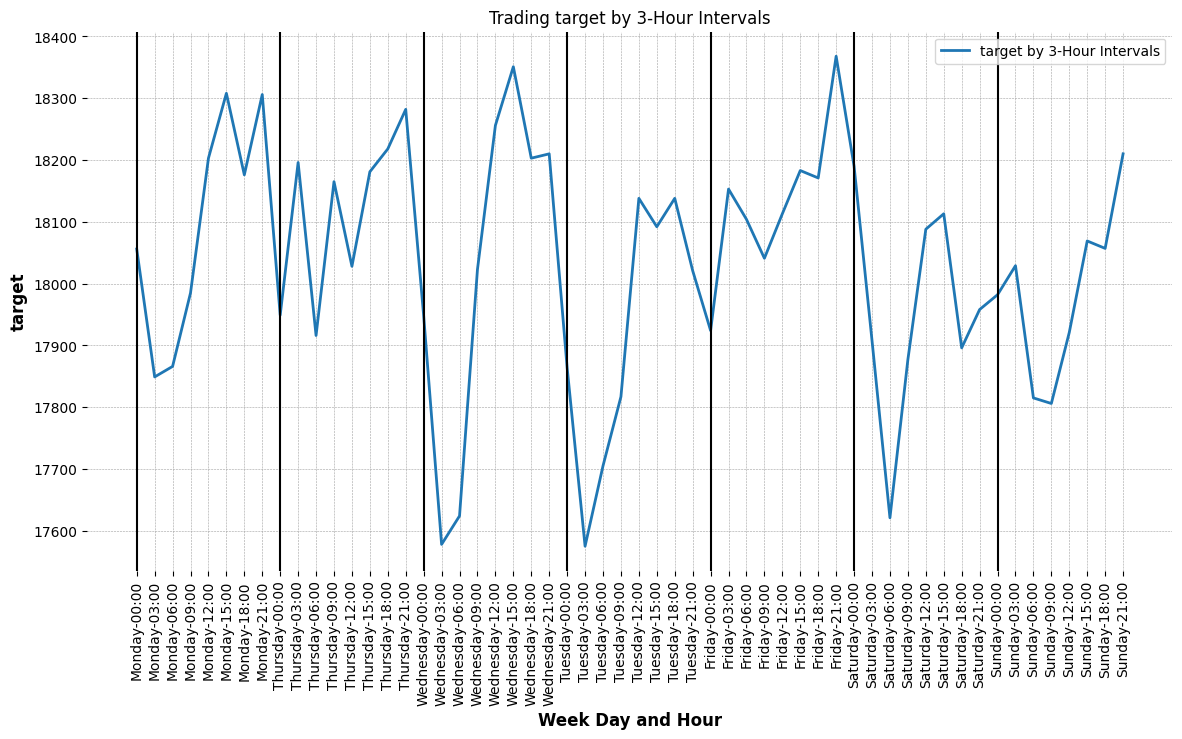

In [19]:


# Resample the data to 6-hour intervals and sum the target
target_3h = train_df_copy.copy()
target_3h.set_index('datetime', inplace=True)
target_3h = target_3h['target'].resample('3H').sum()

# Convert the resampled data to a DataFrame for better readability
target_3h_df = target_3h.to_frame().reset_index()

# Add columns for day of the week and hour of the day
target_3h_df['day_of_week'] = target_3h_df['datetime'].dt.dayofweek
target_3h_df['hour'] = target_3h_df['datetime'].dt.hour
target_3h_df['week_day_hour'] = target_3h_df['day_of_week'].astype(str).str.zfill(2) + '-' + target_3h_df['hour'].astype(str).str.zfill(2) + ':00'  
grouped_target_3h = target_3h_df.groupby('week_day_hour')['target'].sum()


day_map = {'00-': 'Monday-', '01-': 'Thursday-', '02-': 'Wednesday-', '03-': 'Tuesday-', '04-': 'Friday-', '05-': 'Saturday-', '06-': 'Sunday-'}
labels = list(grouped_target_3h.index)
for day in day_map:
    labels = [label.replace(day, day_map[day]) for label in labels]

plt.figure(figsize=(14, 7))
plt.plot(grouped_target_3h.index, grouped_target_3h.values, label='target by 3-Hour Intervals')
plt.xlabel('Week Day and Hour')
plt.ylabel('target')
plt.title('Trading target by 3-Hour Intervals')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.xticks(rotation=90)
# Make a darker line every 8 ticks
for i in range(len(labels)):
    if i % 8 == 0:
        plt.axvline(x=i, color='black', linewidth=1.5)
plt.legend()
plt.show()


C:\Users\PLour\AppData\Local\Temp\ipykernel_14824\503350124.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  volume_3h = ohlcv_df['volume'].resample('3H').sum()
C:\Users\PLour\AppData\Local\Temp\ipykernel_14824\503350124.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  taker_buy_base_volume_3h = ohlcv_df['taker_buy_base_volume'].resample('3H').sum()


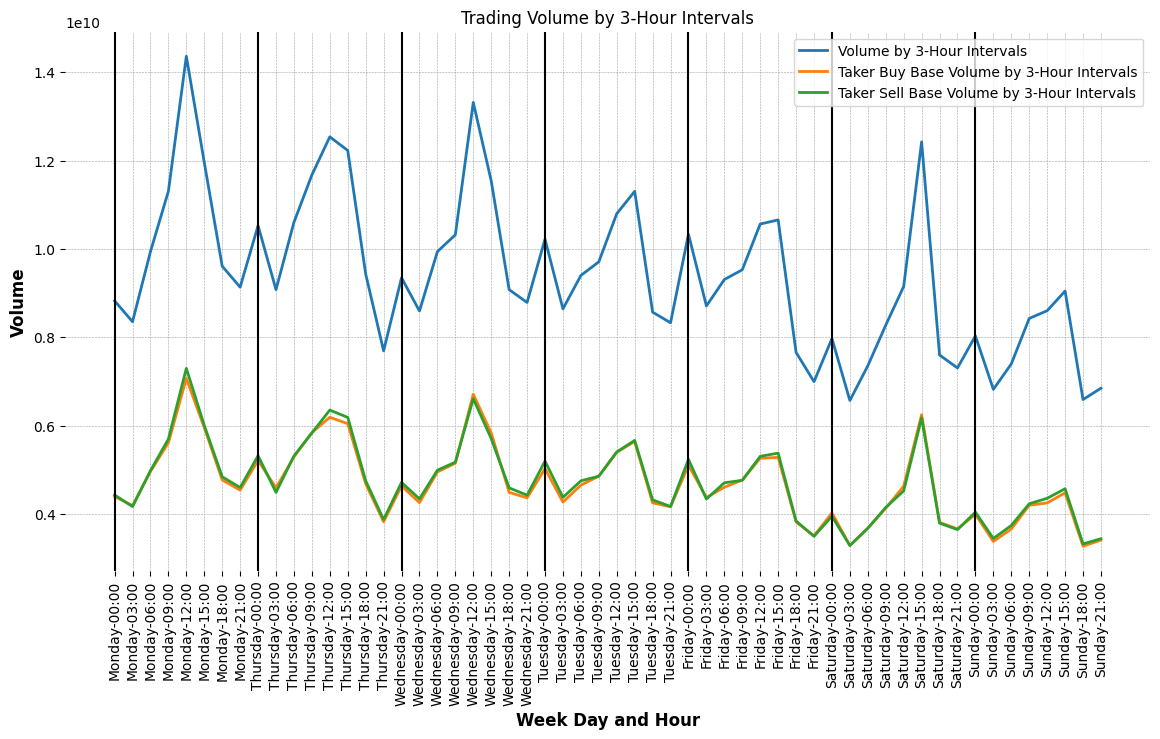

In [20]:
# Resample the data to 6-hour intervals and sum the volume
volume_3h = ohlcv_df['volume'].resample('3H').sum()
taker_buy_base_volume_3h = ohlcv_df['taker_buy_base_volume'].resample('3H').sum()
taker_sell_base_volume_3h = volume_3h - taker_buy_base_volume_3h

# Convert the resampled data to a DataFrame for better readability
volume_3h_df = volume_3h.to_frame().reset_index()
taker_buy_base_volume_3h_df = taker_buy_base_volume_3h.to_frame().reset_index()
taker_sell_base_volume_3h = taker_sell_base_volume_3h.to_frame().reset_index()

# Add columns for day of the week and hour of the day
volume_3h_df['day_of_week'] = volume_3h_df['timestamp'].dt.dayofweek
volume_3h_df['hour'] = volume_3h_df['timestamp'].dt.hour
volume_3h_df['week_day_hour'] = volume_3h_df['day_of_week'].astype(str).str.zfill(2) + '-' + volume_3h_df['hour'].astype(str).str.zfill(2) + ':00'  
grouped_volume_3h = volume_3h_df.groupby('week_day_hour')['volume'].sum()

taker_buy_base_volume_3h_df['day_of_week'] = taker_buy_base_volume_3h_df['timestamp'].dt.dayofweek
taker_buy_base_volume_3h_df['hour'] = taker_buy_base_volume_3h_df['timestamp'].dt.hour
taker_buy_base_volume_3h_df['week_day_hour'] = taker_buy_base_volume_3h_df['day_of_week'].astype(str).str.zfill(2) + '-' + taker_buy_base_volume_3h_df['hour'].astype(str).str.zfill(2) + ':00'  
grouped_taker_buy_base_volume_3h = taker_buy_base_volume_3h_df.groupby('week_day_hour')['taker_buy_base_volume'].sum()

taker_sell_base_volume_3h['day_of_week'] = taker_sell_base_volume_3h['timestamp'].dt.dayofweek
taker_sell_base_volume_3h['hour'] = taker_sell_base_volume_3h['timestamp'].dt.hour
taker_sell_base_volume_3h['week_day_hour'] = taker_sell_base_volume_3h['day_of_week'].astype(str).str.zfill(2) + '-' + taker_sell_base_volume_3h['hour'].astype(str).str.zfill(2) + ':00'
grouped_taker_sell_base_volume_3h = taker_sell_base_volume_3h.groupby('week_day_hour')[0].sum()



day_map = {'00-': 'Monday-', '01-': 'Thursday-', '02-': 'Wednesday-', '03-': 'Tuesday-', '04-': 'Friday-', '05-': 'Saturday-', '06-': 'Sunday-'}
labels = list(grouped_volume_3h.index)
for day in day_map:
    labels = [label.replace(day, day_map[day]) for label in labels]

plt.figure(figsize=(14, 7))
plt.plot(grouped_volume_3h.index, grouped_volume_3h.values, label='Volume by 3-Hour Intervals')
plt.plot(grouped_taker_buy_base_volume_3h.index, grouped_taker_buy_base_volume_3h.values, label='Taker Buy Base Volume by 3-Hour Intervals')
plt.plot(grouped_taker_sell_base_volume_3h.index, grouped_taker_sell_base_volume_3h.values, label='Taker Sell Base Volume by 3-Hour Intervals')
plt.xlabel('Week Day and Hour')
plt.ylabel('Volume')
plt.title('Trading Volume by 3-Hour Intervals')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.xticks(rotation=90)
# Make a darker line every 8 ticks
for i in range(len(labels)):
    if i % 8 == 0:
        plt.axvline(x=i, color='black', linewidth=1.5)
plt.legend()
plt.show()


In [ ]:
# Calculate the correlation between close growth and volume
correlation_close_growth_volume = close_growth.corr(ohlcv_df['volume'])
print(f"Correlation between close growth and volume: {correlation_close_growth_volume}")


Correlation between close growth and volume: -0.03633268905475513


C:\Users\PLour\AppData\Local\Temp\ipykernel_14824\3972818416.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  close_3h = ohlcv_df['close'].resample('3H').sum()


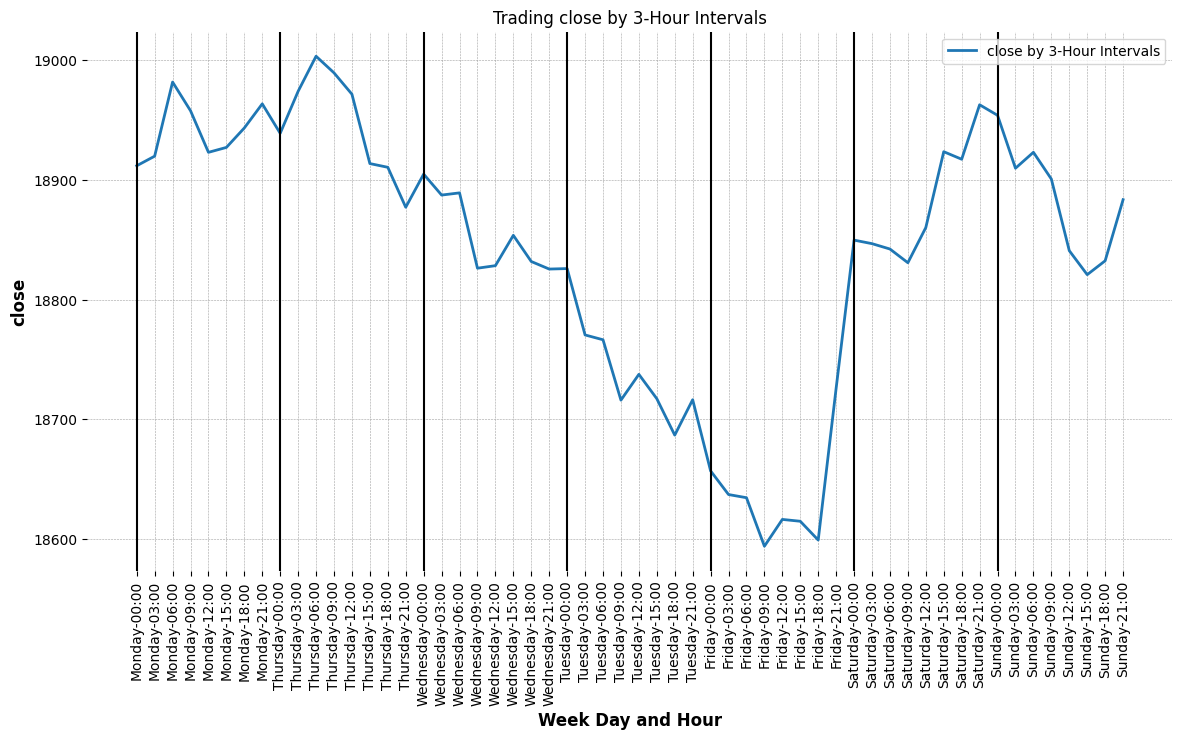

In [21]:
# Resample the data to 6-hour intervals and sum the close
close_3h = ohlcv_df['close'].resample('3H').sum()

# Convert the resampled data to a DataFrame for better readability
close_3h_df = close_3h.to_frame().reset_index()

# Add columns for day of the week and hour of the day
close_3h_df['day_of_week'] = close_3h_df['timestamp'].dt.dayofweek
close_3h_df['hour'] = close_3h_df['timestamp'].dt.hour
close_3h_df['week_day_hour'] = close_3h_df['day_of_week'].astype(str).str.zfill(2) + '-' + close_3h_df['hour'].astype(str).str.zfill(2) + ':00'  
grouped_close_3h = close_3h_df.groupby('week_day_hour')['close'].sum()


day_map = {'00-': 'Monday-', '01-': 'Thursday-', '02-': 'Wednesday-', '03-': 'Tuesday-', '04-': 'Friday-', '05-': 'Saturday-', '06-': 'Sunday-'}
labels = list(grouped_close_3h.index)
for day in day_map:
    labels = [label.replace(day, day_map[day]) for label in labels]

plt.figure(figsize=(14, 7))
plt.plot(grouped_close_3h.index, grouped_close_3h.values, label='close by 3-Hour Intervals')
plt.xlabel('Week Day and Hour')
plt.ylabel('close')
plt.title('Trading close by 3-Hour Intervals')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.xticks(rotation=90)
# Make a darker line every 8 ticks
for i in range(len(labels)):
    if i % 8 == 0:
        plt.axvline(x=i, color='black', linewidth=1.5)
plt.legend()
plt.show()


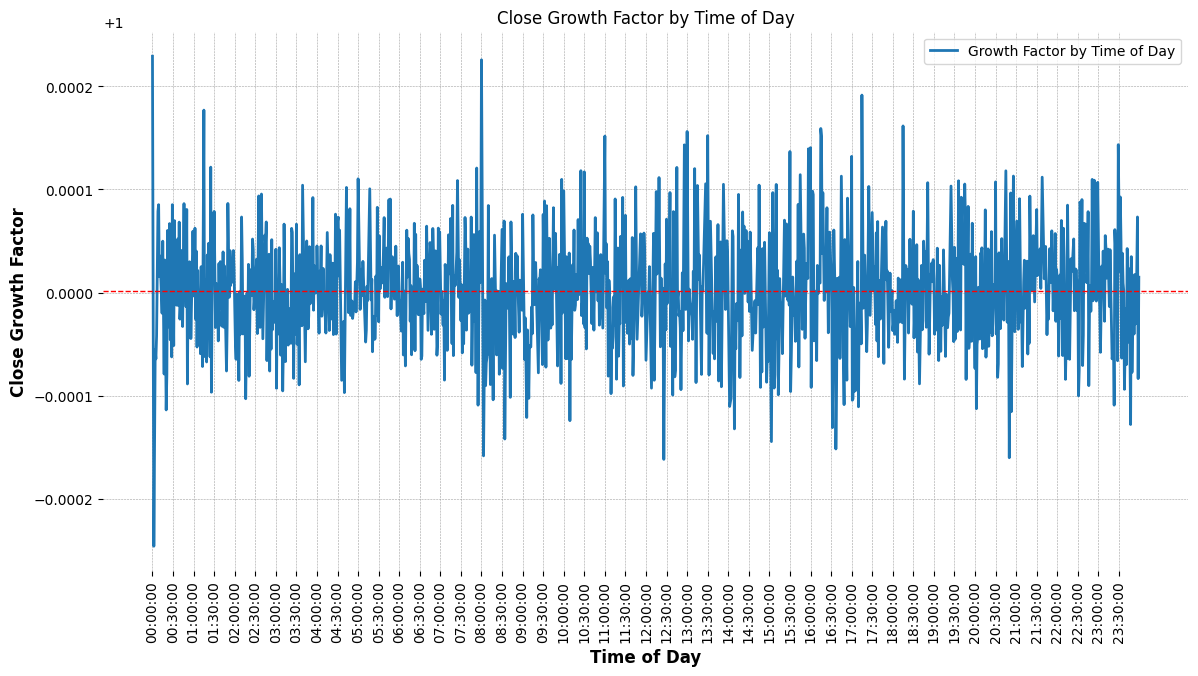

In [26]:
# Calculate the growth factor of the close value by minute
growth_factor_by_minute = ohlcv_df['close'].pct_change() + 1

# Aggregate the growth factor by minute per time of day
growth_factor_by_time_of_day = growth_factor_by_minute.groupby(ohlcv_df['time_of_day'].astype(str)).mean()

plt.figure(figsize=(14, 7))
plt.plot(growth_factor_by_time_of_day.index, growth_factor_by_time_of_day.values, label='Growth Factor by Time of Day')
plt.axhline(y=growth_factor_by_time_of_day.mean(), color='r', linestyle='--', linewidth=1)
plt.xlabel('Time of Day')
plt.ylabel('Close Growth Factor')
plt.title('Close Growth Factor by Time of Day')
plt.xticks(rotation=90)
plt.xticks(ticks=range(0, len(growth_factor_by_time_of_day), 30), labels=growth_factor_by_time_of_day.index[::30], rotation=90)
plt.legend()
plt.show()


# Check Stationarity

### ADF Test

In [23]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(data, window_size):
    adf_statistics = []
    p_values = []
    critical_values = []

    for start in range(0, len(data), window_size):
        end = start + window_size
        window_data = data[start:end]

        if len(window_data) < window_size:
            break

        adf_result = adfuller(window_data)
        adf_statistics.append(adf_result[0])
        p_values.append(adf_result[1])
        critical_values.append(adf_result[4])

    results = {
        'Window': list(range(1, len(adf_statistics) + 1)),
        'ADF Statistic': adf_statistics,
        'p-value': p_values,
        'Critical Values': critical_values
    }

    return pd.DataFrame(results)

#### Apply for entire dataframe

In [24]:
# Apply perform_adf_test to all features of the train_df
window_size = 10000
adf_results = {}

for column in train_df.columns:
    if train_df[column].dtype in ['float64', 'int64']:  # Ensure the column is numeric
        print(f"Performing ADF test on {column}...")
        result_df = perform_adf_test(train_df[column], window_size)
        adf_results[column] = result_df
        
        # Calculate the number of stationary windows
        stationary_windows = result_df[result_df['p-value'] < 0.05]
        print(f"Number of stationary windows for {column}: {len(stationary_windows)} out of {len(train_df) // window_size}")

# Save the results to CSV files
for column, result_df in adf_results.items():
    result_df.to_csv(f'ADF_results/adf_test_results_{column}.csv', index=False)

# Display the results for the first feature as an example
adf_results[list(adf_results.keys())[0]]

Performing ADF test on timestamp...
Number of stationary windows for timestamp: 1 out of 212
Performing ADF test on open...
Number of stationary windows for open: 26 out of 212
Performing ADF test on high...
Number of stationary windows for high: 27 out of 212
Performing ADF test on low...


KeyboardInterrupt: 

In [ ]:
# Apply log filter and differentiate all features
treated_train_df = train_df.copy()

# Apply log filter to numeric columns
for column in treated_train_df.columns:
    if np.issubdtype(treated_train_df[column].dtype, np.number):
        treated_train_df[column] = np.log(treated_train_df[column] + 1)

# Differentiate the numeric columns
treated_train_df = treated_train_df.diff().dropna()

# Apply perform_adf_test to all features of the treated_train_df
window_size = 10000
adf_results_treated = {}

for column in treated_train_df.columns:
    if treated_train_df[column].dtype in ['float64', 'int64']:  # Ensure the column is numeric
        print(f"Performing ADF test on {column}...")
        result_df = perform_adf_test(treated_train_df[column], window_size)
        adf_results_treated[column] = result_df
        
        # Calculate the number of stationary windows
        stationary_windows = result_df[result_df['p-value'] < 0.05]
        print(f"Number of stationary windows for {column}: {len(stationary_windows)} out of {len(treated_train_df) // window_size}")

# Save the results to CSV files
for column, result_df in adf_results_treated.items():
    result_df.to_csv(f'adf_test_results_treated_{column}.csv', index=False)

# Display the results for the first feature as an example
adf_results_treated[list(adf_results_treated.keys())[0]]

Performing ADF test on timestamp...
Number of stationary windows for timestamp: 0 out of 212
Performing ADF test on open...
Number of stationary windows for open: 212 out of 212
Performing ADF test on high...
Number of stationary windows for high: 212 out of 212
Performing ADF test on low...
Number of stationary windows for low: 212 out of 212
Performing ADF test on close...
Number of stationary windows for close: 212 out of 212
Performing ADF test on volume...


#### Apply for close

In [ ]:
from statsmodels.tsa.stattools import adfuller

start_time = time.time()

results_df = perform_adf_test(train_df['close'], window_size=10000)
results_df.to_csv('adf_test_results.csv', index=False)

# Check if the series is stationary based on the ADF test results
stationary_windows = results_df[results_df['p-value'] < 0.05]

end_time = time.time()
execution_time = end_time - start_time
minutes = execution_time // 60
seconds = execution_time % 60
print(f'Execution time: {minutes:.0f} minutes and {seconds:.0f} seconds')
print('-----------------------------------------------')
print(f'Number of windows: {len(results_df)}')
print(f"Number of stationary windows: {len(stationary_windows)}")
print(f'Percentage of stationary windows: {len(stationary_windows) / len(results_df) * 100:.2f}%')


AttributeError: 'builtin_function_or_method' object has no attribute 'time'

In [ ]:
from statsmodels.tsa.stattools import adfuller

start_time = time.time()

results_df = perform_adf_test(treated_train_df['close'], window_size=10000)
results_df.to_csv('adf_test_results.csv', index=False)

# Check if the series is stationary based on the ADF test results
stationary_windows = results_df[results_df['p-value'] < 0.05]

end_time = time.time()
execution_time = end_time - start_time
minutes = execution_time // 60
seconds = execution_time % 60
print(f'Execution time: {minutes:.0f} minutes and {seconds:.0f} seconds')
print('-----------------------------------------------')
print(f'Number of windows: {len(results_df)}')
print(f"Number of stationary windows: {len(stationary_windows)}")
print(f'Percentage of stationary windows: {len(stationary_windows) / len(results_df) * 100:.2f}%')


#### Apply for volume

In [ ]:


# Use the extracted method
start_time = time.time()

window_size = 10000
results_df = perform_adf_test(train_df['volume'], window_size)
results_df.to_csv('adf_volume_test_results.csv', index=False)

stationary_windows = results_df[results_df['p-value'] < 0.05]

end_time = time.time()
execution_time = end_time - start_time
minutes = execution_time // 60
seconds = execution_time % 60
print(f'Execution time: {minutes:.0f} minutes and {seconds:.0f} seconds')
print('-----------------------------------------------')
print(f'Number of windows: {len(results_df)}')
print(f"Number of stationary windows: {len(stationary_windows)}")
print(f'Percentage of stationary windows: {len(stationary_windows) / len(results_df) * 100:.2f}%')


Number of windows: 212
Number of stationary windows: 212
Percentage of stationary windows: 100.00%


In [ ]:


# Use the extracted method
start_time = time.time()

window_size = 10000
results_df = perform_adf_test(treated_train_df['volume'], window_size)
results_df.to_csv('adf_volume_test_results.csv', index=False)

stationary_windows = results_df[results_df['p-value'] < 0.05]

end_time = time.time()
execution_time = end_time - start_time
minutes = execution_time // 60
seconds = execution_time % 60
print(f'Execution time: {minutes:.0f} minutes and {seconds:.0f} seconds')
print('-----------------------------------------------')
print(f'Number of windows: {len(results_df)}')
print(f"Number of stationary windows: {len(stationary_windows)}")
print(f'Percentage of stationary windows: {len(stationary_windows) / len(results_df) * 100:.2f}%')


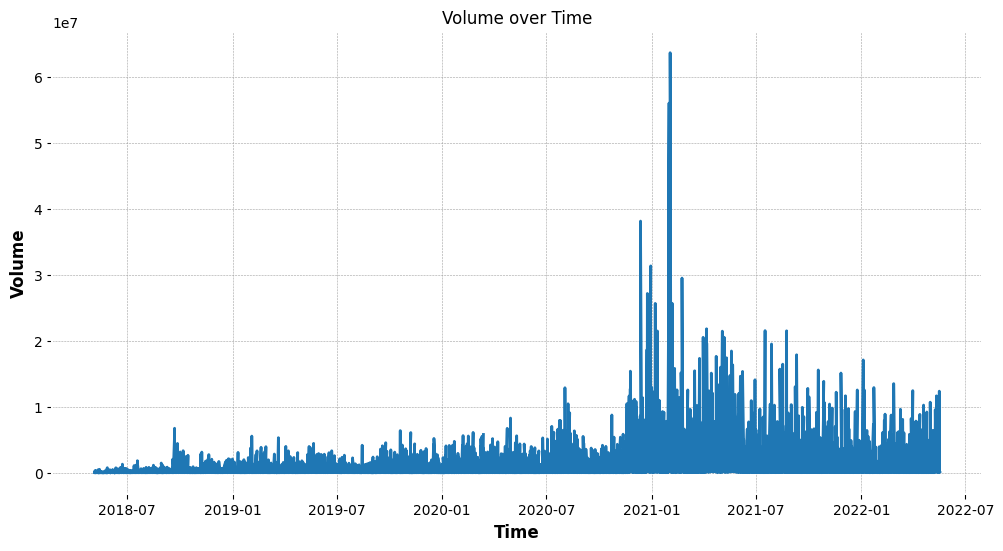

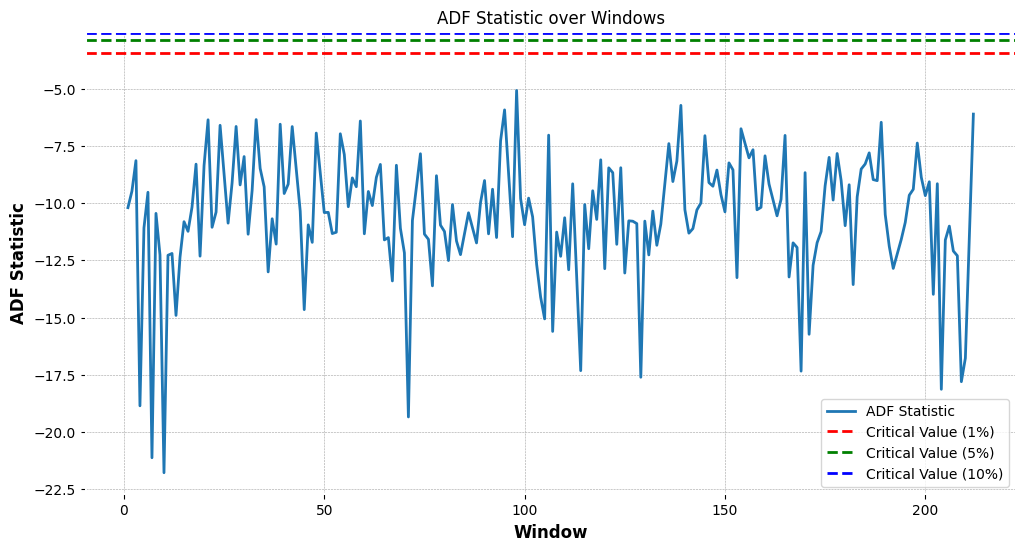

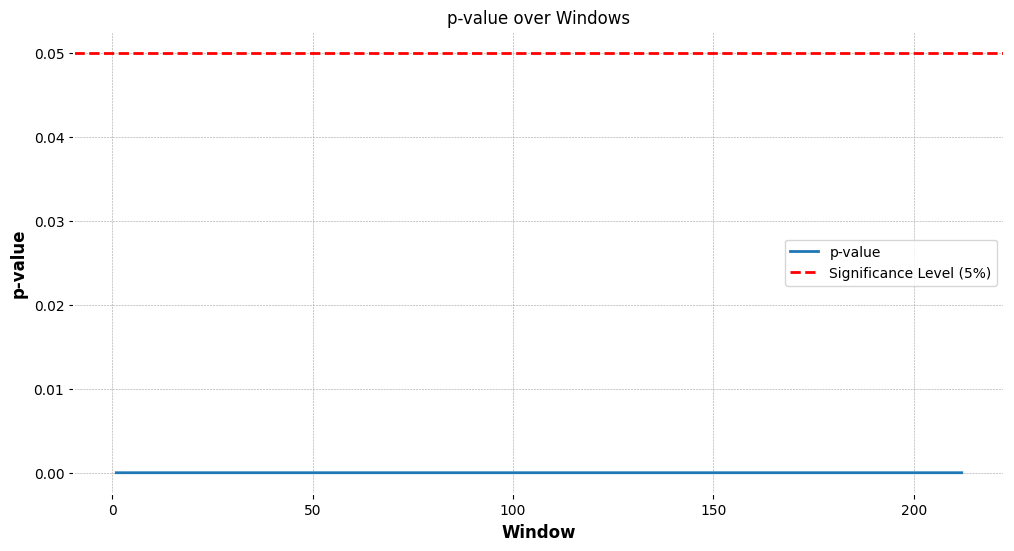

In [ ]:
import matplotlib.pyplot as plt

# Plotar a série temporal completa
plt.figure(figsize=(12, 6))
plt.plot(ohlcv_df['volume'])
plt.title('Volume over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()

# Plotar as estatísticas ADF para cada janela
plt.figure(figsize=(12, 6))
plt.plot(results_df['Window'], results_df['ADF Statistic'], label='ADF Statistic')
plt.axhline(y=-3.434, color='r', linestyle='--', label='Critical Value (1%)')
plt.axhline(y=-2.863, color='g', linestyle='--', label='Critical Value (5%)')
plt.axhline(y=-2.567, color='b', linestyle='--', label='Critical Value (10%)')
plt.title('ADF Statistic over Windows')
plt.xlabel('Window')
plt.ylabel('ADF Statistic')
plt.legend()
plt.show()

# Plotar os valores p para cada janela
plt.figure(figsize=(12, 6))
plt.plot(results_df['Window'], results_df['p-value'], label='p-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (5%)')
plt.title('p-value over Windows')
plt.xlabel('Window')
plt.ylabel('p-value')
plt.legend()
plt.show()

## Checking what does "Target" mean

In [ ]:
# Shift the 'open' column by one to align it with the 'close' column
shifted_open = ohlcv_df['open'].shift(-1)

# Compare the 'close' column with the shifted 'open' column
comparison = ohlcv_df['close'] == shifted_open

print(f'{len(comparison[comparison == True]) / len(comparison) * 100}% of the time the close price is equal to the next day open price')

# Shift the 'close' column by one to get the next timestamp's closing price
shifted_close = ohlcv_df['close'].shift(-1)

# Compare the current 'close' column with the shifted 'close' column
comparison_next_close = ohlcv_df['close'] < shifted_close

# shows that the objective is to predict if the next timestaemp close price is higher than the current timestamp close price
equal_target_and_comparison = train_df['target'].values.astype(bool)[:-1] == comparison_next_close.values[:-1]
print(f'{len(equal_target_and_comparison[equal_target_and_comparison == True]) / len(equal_target_and_comparison) * 100}% of the time the target is equal to the next day close price')

30.83995857593956% of the time the close price is equal to the next day open price
100.0% of the time the target is equal to the next day close price


In [ ]:
submission_df = pd.read_csv(SAMPLE_SUBMISSION_PATH)
submission_df